In [1]:
import numpy as np
import pandas as pd
import re

data = pd.read_csv('bigdata/data.csv', header=None)
data = data.rename(columns={0: 'surname', 1: 'name', 2: 'father_name', 3: 'sex'})

In [2]:
data.head(10)

,surname,name,father_name,sex
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,М
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,М
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,М
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,М
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,М
5,АБАБИЛОВ,АЛЕКСЕЙ,НИКОЛАЕВИЧ,М
6,АБАБИЛОВ,ВАСИЛИЙ,ФЕДОРОВИЧ,М
7,АБАБИЛОВ,СЕРГЕЙ,ВАСИЛЬЕВИЧ,М
8,АБАБИЛОВ,ЛЕОНИД,АЛЕКСЕЕВИЧ,М
9,АБАБИЛОВА,НИНА,ПЕТРОВНА,Ж


In [3]:
data.describe(include='all')

,surname,name,father_name,sex
count,6228597,6228554,6225770,6228608
unique,383445,45199,81009,8
top,ИВАНОВА,АЛЕКСАНДР,АЛЕКСАНДРОВНА,Ж
freq,24285,271380,310929,3505323


In [4]:
data.shape

(6228608, 4)

In [5]:
males = data.loc[data['sex'] == 'М']
females = data.loc[data['sex'] == 'Ж']

In [6]:
pd.isnull(data).sum()

surname          11
name             54
father_name    2838
sex               0
dtype: int64

In [7]:
pd.isnull(males).sum()

surname           7
name             18
father_name    1314
sex               0
dtype: int64

In [8]:
pd.isnull(females).sum()

surname           4
name             36
father_name    1524
sex               0
dtype: int64

In [9]:
data.duplicated().sum()

2006516

## Распределение по полу

In [10]:
sex_distr = data['sex'].value_counts()
sex_distr

sex
Ж     3505323
М     2723277
ФИ          2
Л.          2
ЗИ          1
ТУ          1
НА          1
Д           1
Name: count, dtype: int64

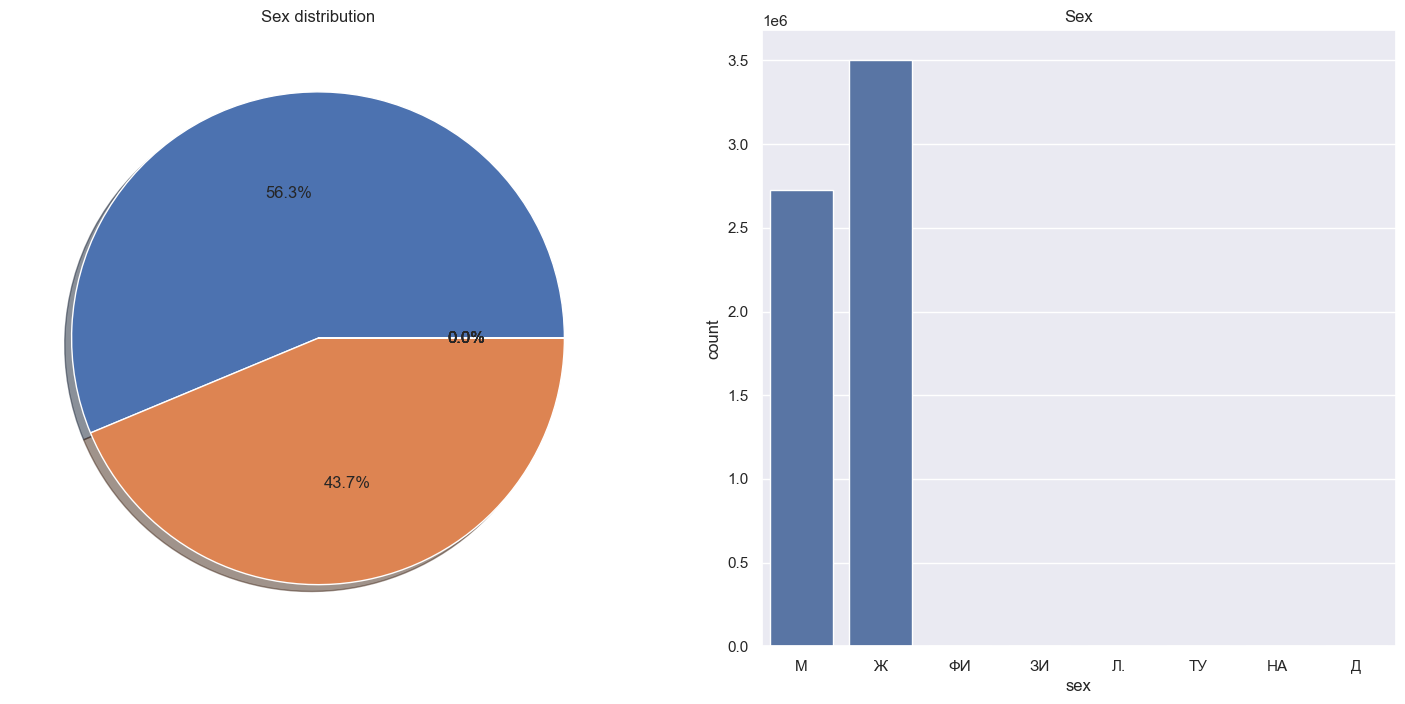

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].pie(x=sex_distr, autopct='%1.1f%%', shadow=True)

ax[0].set_title('Sex distribution')
ax[0].set_ylabel('')

sns.countplot(x='sex', data=data, ax=ax[1])
ax[1].set_title('Sex')
plt.show()

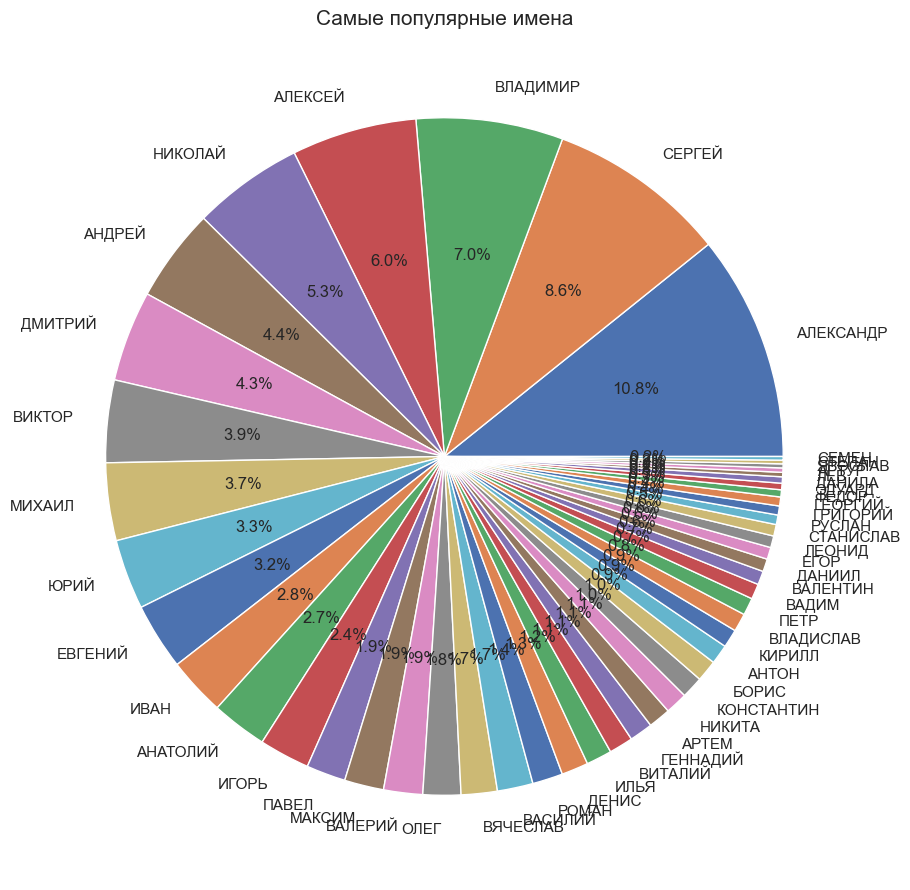

In [12]:
labels = males['name'].value_counts().index[:50]
sizes = males['name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Самые популярные имена", size=15)
plt.show()

In [13]:
labels = males['name'].value_counts().index[-50:]
sizes = males['name'].value_counts().values[-50:]
unpopular_names = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_names

,labels,sizes
0,ШИНБОЛАТ,1
1,МИРЗОИМАД,1
2,ХАФЕЗ,1
3,НЮРИК,1
4,МАЪРИФ,1
5,ГЮЛЬГАДАР,1
6,АЛЕТДИН,1
7,КАЗЕМИРАС,1
8,ЧАРАБУЛА,1
9,БАЯНУУР,1


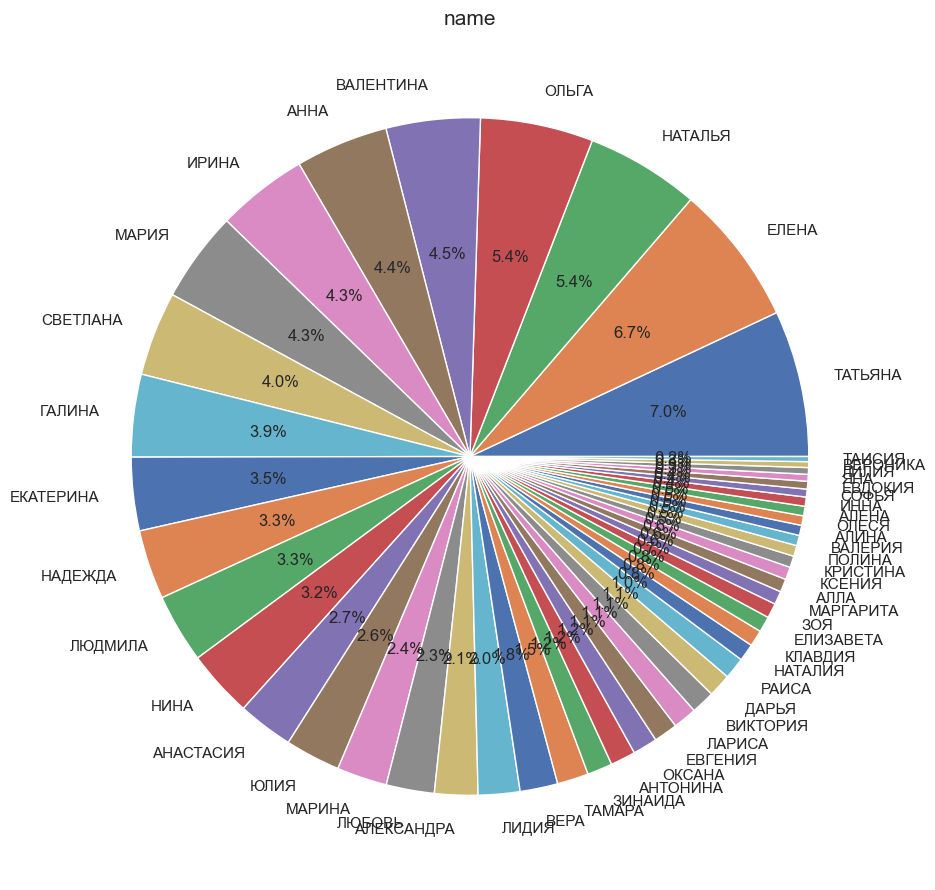

In [14]:
labels = females['name'].value_counts().index[:50]
sizes = females['name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("name", size=15)
plt.show()

In [15]:
labels = females['name'].value_counts().index[-50:]
sizes = females['name'].value_counts().values[-50:]
unpopular_names = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_names


,labels,sizes
0,ГАЛИКАСВАПНА,1
1,МОРИЯ,1
2,ГОЛФЯР,1
3,НАСИМИ,1
4,ЗЕЛЬКАБИРА,1
5,НЯЗОФЕ,1
6,АЙНИСЕ,1
7,ТОЙГАЛЧЕ,1
8,ЗАЗАЙ,1
9,НУРЬЯН,1


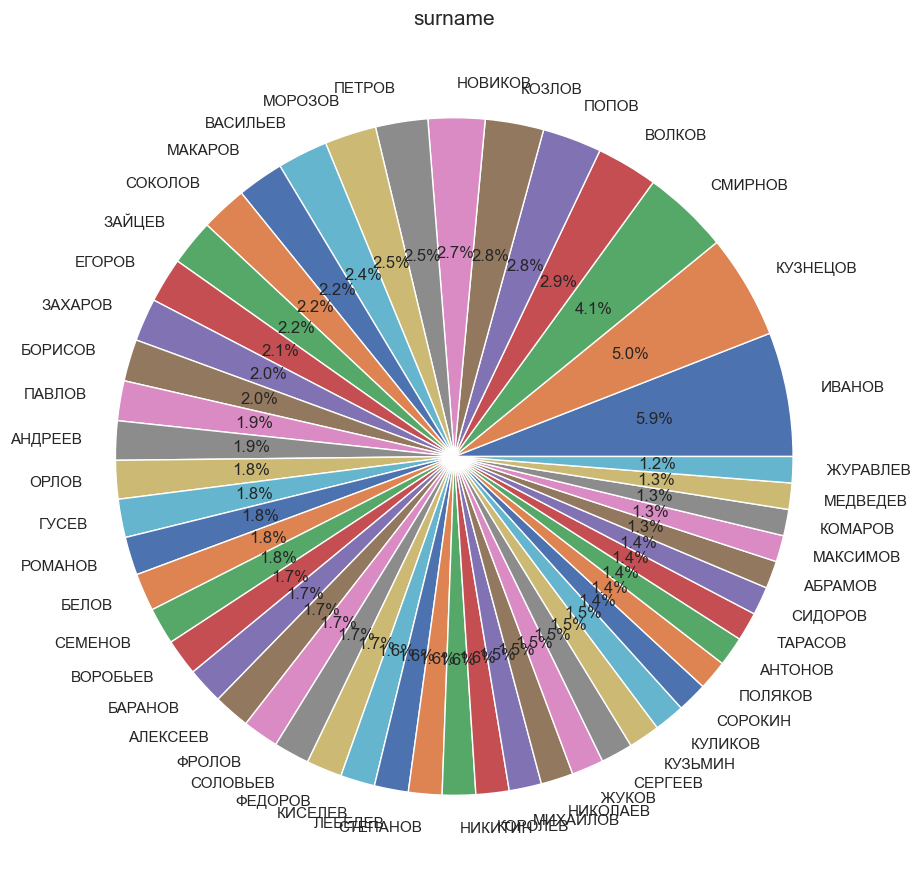

In [16]:
labels = males['surname'].value_counts().index[:50]
sizes = males['surname'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("surname", size=15)
plt.show()

In [17]:
labels = males['surname'].value_counts().index[-50:]
sizes = males['surname'].value_counts().values[-50:]
unpopular_surnames = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_surnames

,labels,sizes
0,НИКОГДА,1
1,ШУАКБАЕВ,1
2,АЮЧАТОВ,1
3,ШИТИМИРОВ,1
4,ЯРУШЕВСКИЙ,1
5,МЫСЬ,1
6,ЛОУС,1
7,ЛАБУГИН,1
8,ПОТАМАН,1
9,ЖЕЛТЕНОВ,1


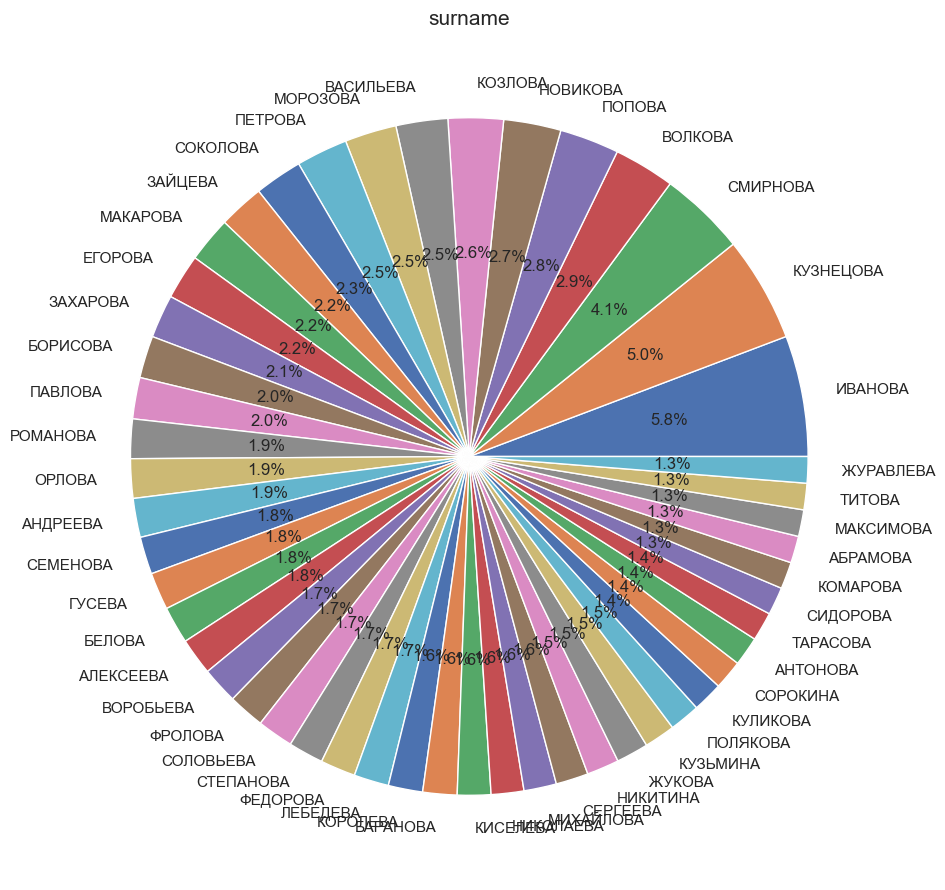

In [18]:
labels = females['surname'].value_counts().index[:50]
sizes = females['surname'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("surname", size=15)
plt.show()

In [19]:
labels = females['surname'].value_counts().index[-50:]
sizes = females['surname'].value_counts().values[-50:]
unpopular_surnames = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_surnames

,labels,sizes
0,ИСТОИИНА,1
1,СЕКРЕТА,1
2,АКОПДХАНЯН,1
3,ЧЕКАЙ,1
4,КЕРСАГИНА,1
5,ГАРНШИНА,1
6,НИЗОКОВА,1
7,КАЛТЫПИНА,1
8,МАКАРОВА-ЗЕМЛЯНСКАЯ,1
9,СМОЛЯНЮК,1


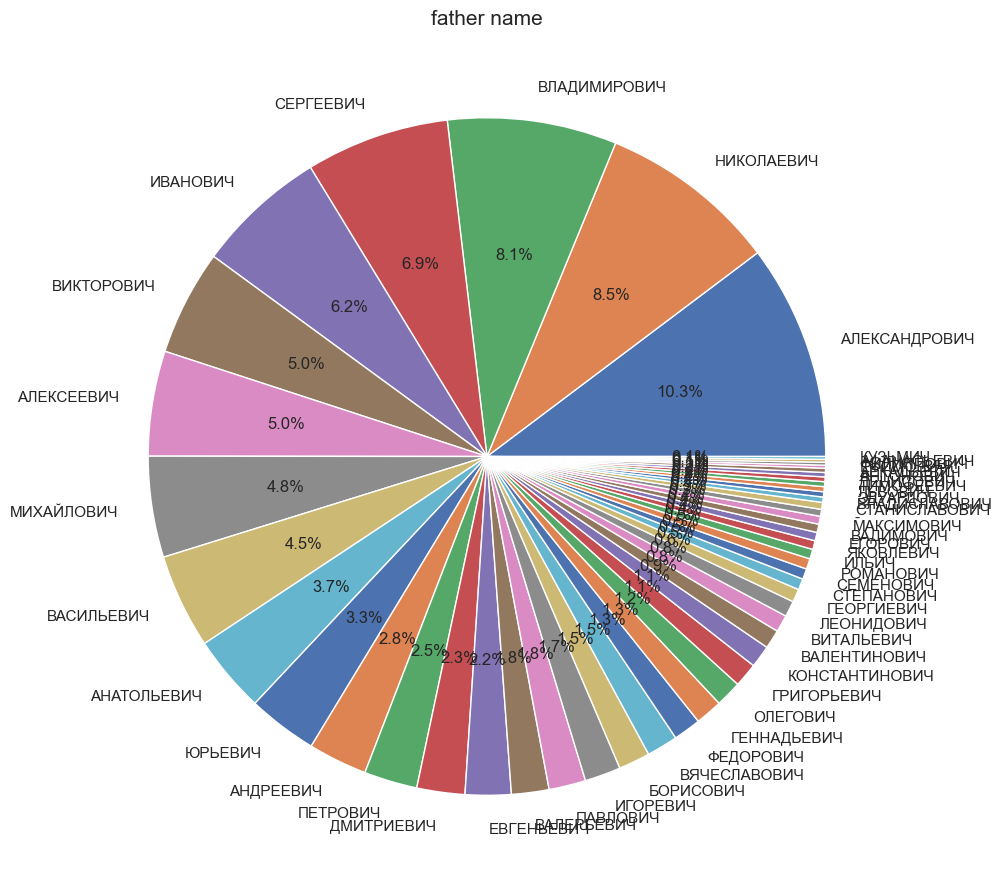

In [20]:
labels = males['father_name'].value_counts().index[:50]
sizes = males['father_name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("father name", size=15)
plt.show()

In [21]:
labels = males['father_name'].value_counts().index[-50:]
sizes = males['father_name'].value_counts().values[-50:]
unpopular_f_names = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_f_names

,labels,sizes
0,АГА КИШИ ОГЛЫ,1
1,СИБАГАТУЛЛОВИЧ,1
2,НАГИМУРОВИЧ,1
3,ВАРДАНОВНА,1
4,САФАРБАЕВИЧ,1
5,ЕВТРОПЬЕВИЧ,1
6,ГЕОРГИЙ АЛЕКСАНДРОВИЧ,1
7,ЕВГШЕНЬЕВИЧ,1
8,ФАНИНОВИЧ,1
9,ИНДРЕЕВИЧ,1


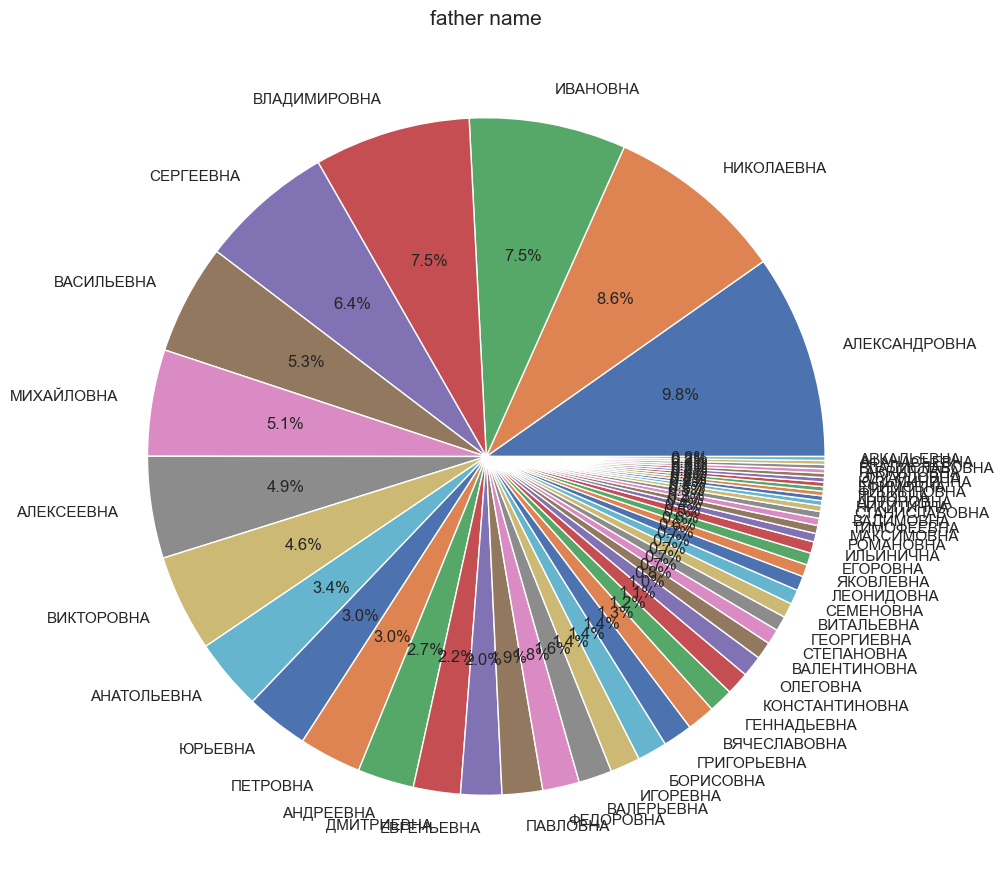

In [22]:
labels = females['father_name'].value_counts().index[:50]
sizes = females['father_name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("father name", size=15)
plt.show()

In [23]:
labels = females['father_name'].value_counts().index[-50:]
sizes = females['father_name'].value_counts().values[-50:]
unpopular_fnames = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_fnames

,labels,sizes
0,ИСМЕТИЛОВНА,1
1,ДУРДИБАЕВНА,1
2,УЗДИНОВНА,1
3,ХАБИДОВНА,1
4,КРИСТИНА АЛЕКСЕЕВНА,1
5,БОЙНАЗАРОВНА,1
6,МИГРДАТОВНА,1
7,РОМАНОВНВ,1
8,ДЖАМЛАЙЛАЕВНА,1
9,ХАЦЕНЕКЕВНА,1


# EDA

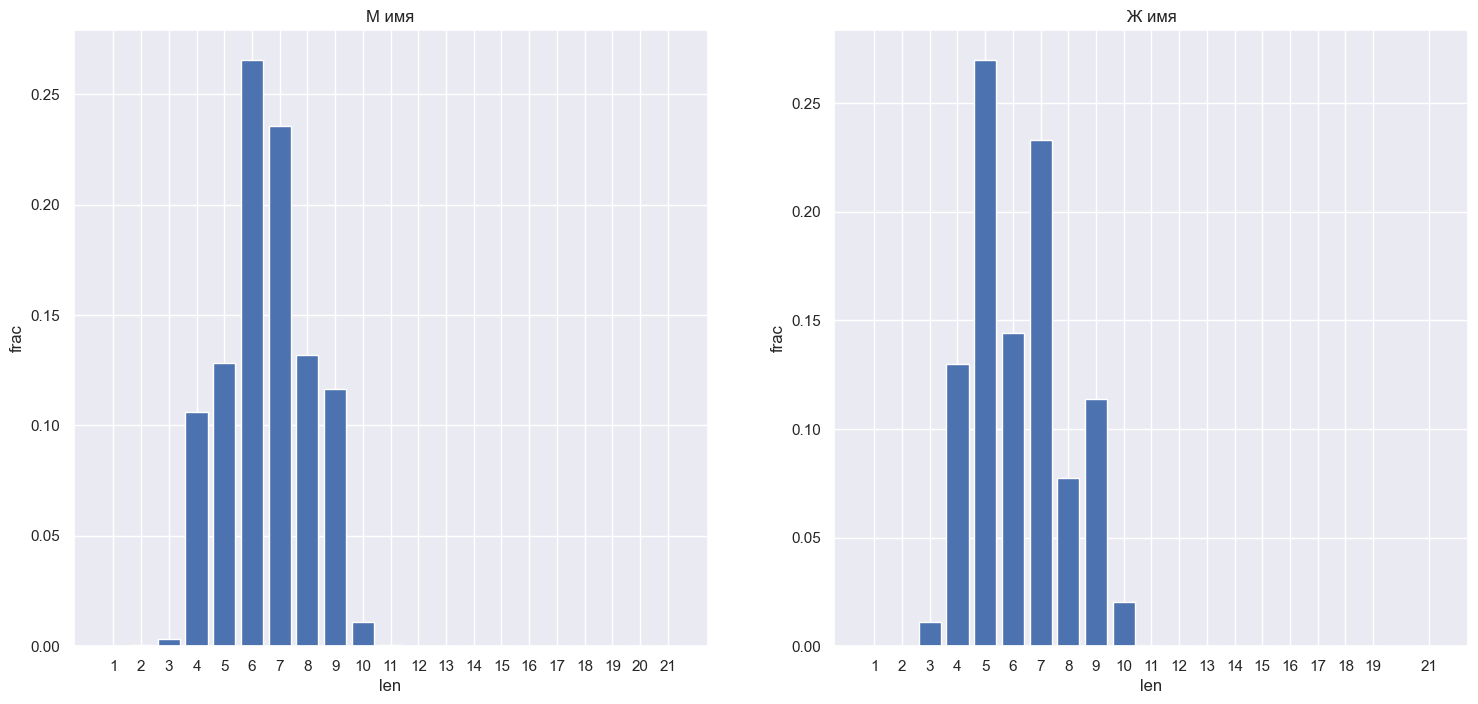

In [24]:
male_lengths = males['name'].str.len().value_counts()
female_lengths = females['name'].str.len().value_counts()
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].bar(male_lengths.index, male_lengths.values / males.shape[0])
ax[0].set_xticks(male_lengths.index)
ax[0].set_title('М имя')
ax[0].set_xlabel('len')
ax[0].set_ylabel('frac')
ax[1].bar(female_lengths.index, female_lengths.values / females.shape[0])
ax[1].set_xticks(female_lengths.index)
ax[1].set_title('Ж имя')
ax[1].set_xlabel('len')
ax[1].set_ylabel('frac')
plt.show()

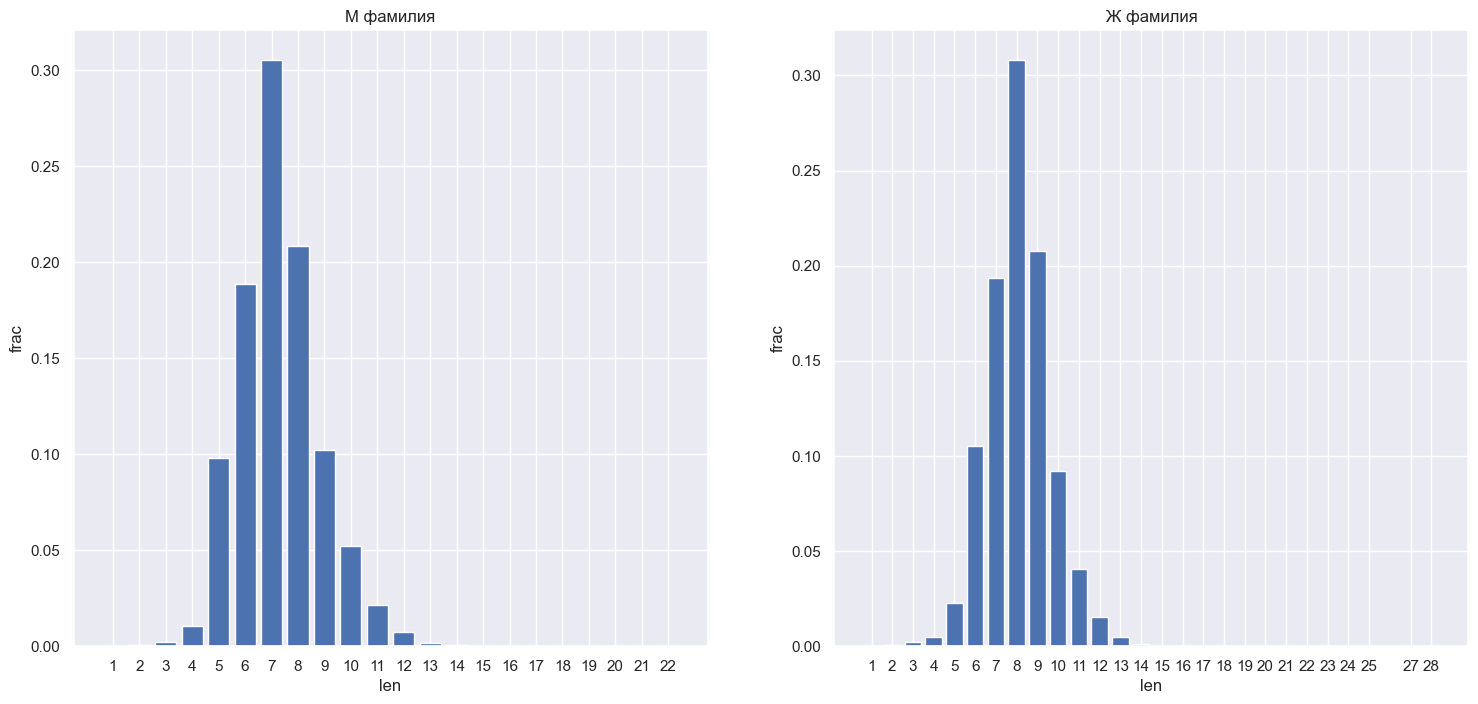

In [25]:
male_lengths = males['surname'].str.len().value_counts()
female_lengths = females['surname'].str.len().value_counts()
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].bar(male_lengths.index, male_lengths.values / males.shape[0])
ax[0].set_xticks(male_lengths.index)
ax[0].set_title('М фамилия')
ax[0].set_xlabel('len')
ax[0].set_ylabel('frac')
ax[1].bar(female_lengths.index, female_lengths.values / females.shape[0])
ax[1].set_xticks(female_lengths.index)
ax[1].set_title('Ж фамилия')
ax[1].set_xlabel('len')
ax[1].set_ylabel('frac')
plt.show()

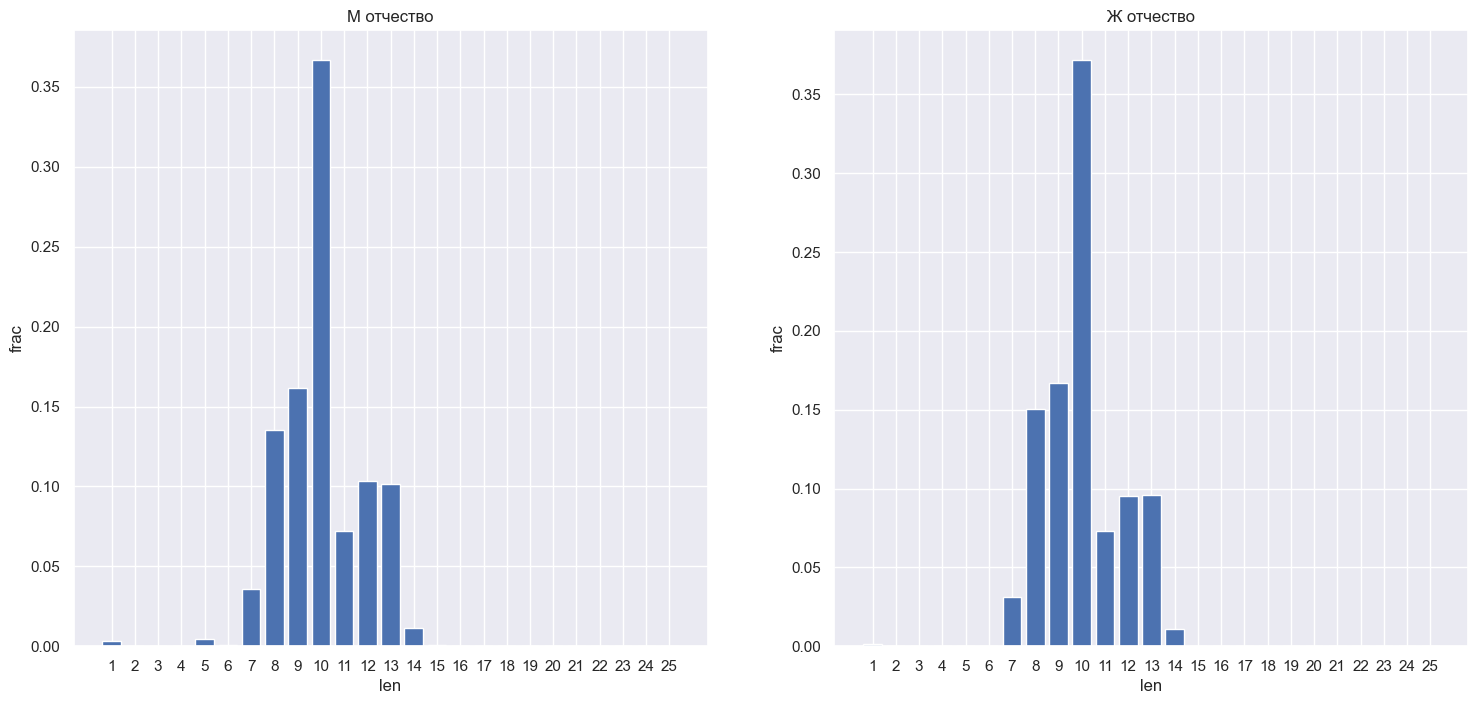

In [26]:
male_lengths = males['father_name'].str.len().value_counts()
female_lengths = females['father_name'].str.len().value_counts()
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].bar(male_lengths.index, male_lengths.values / males.shape[0])
ax[0].set_xticks(male_lengths.index)
ax[0].set_title('М отчество')
ax[0].set_xlabel('len')
ax[0].set_ylabel('frac')
ax[1].bar(female_lengths.index, female_lengths.values / females.shape[0])
ax[1].set_xticks(female_lengths.index)
ax[1].set_title('Ж отчество')
ax[1].set_xlabel('len')
ax[1].set_ylabel('frac')
plt.show()

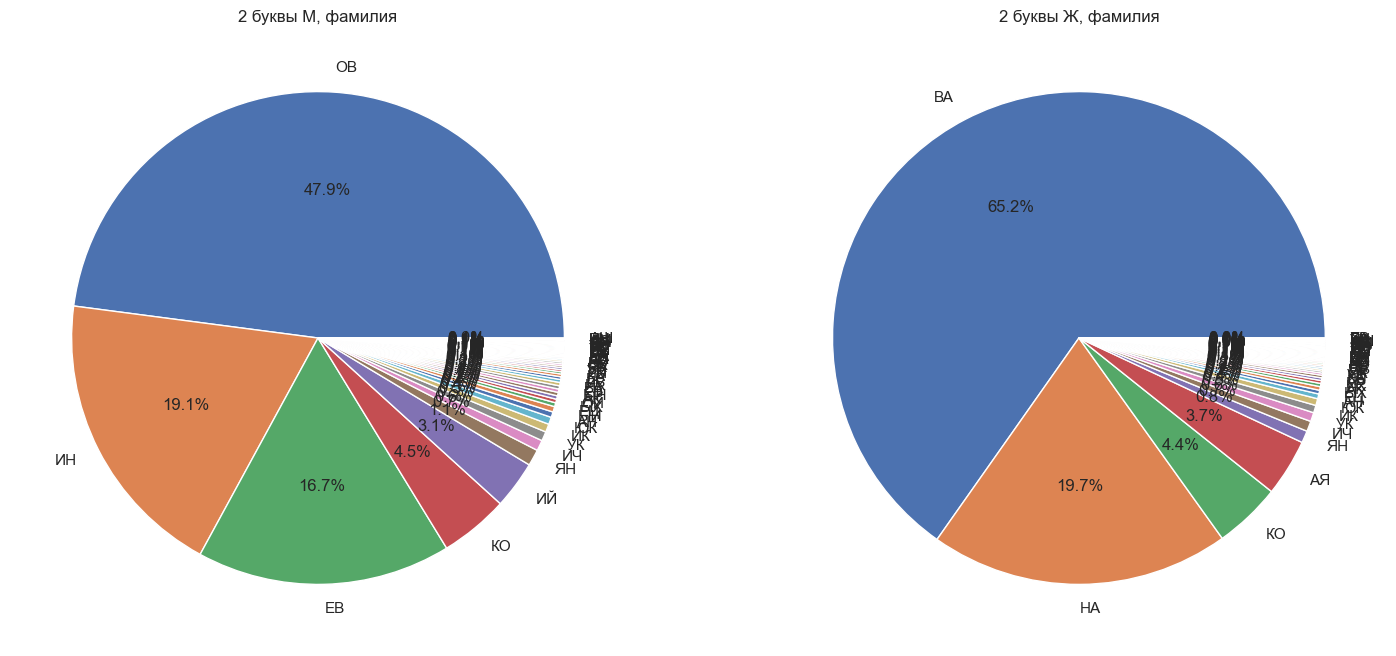

In [27]:
male_ends = males['surname'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
female_ends = females['surname'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].pie(male_ends.values, labels=male_ends.index, autopct="%1.1f%%")
ax[0].set_title('2 буквы М, фамилия')
ax[1].pie(female_ends.values, labels=female_ends.index, autopct="%1.1f%%")
ax[1].set_title('2 буквы Ж, фамилия')
plt.show()

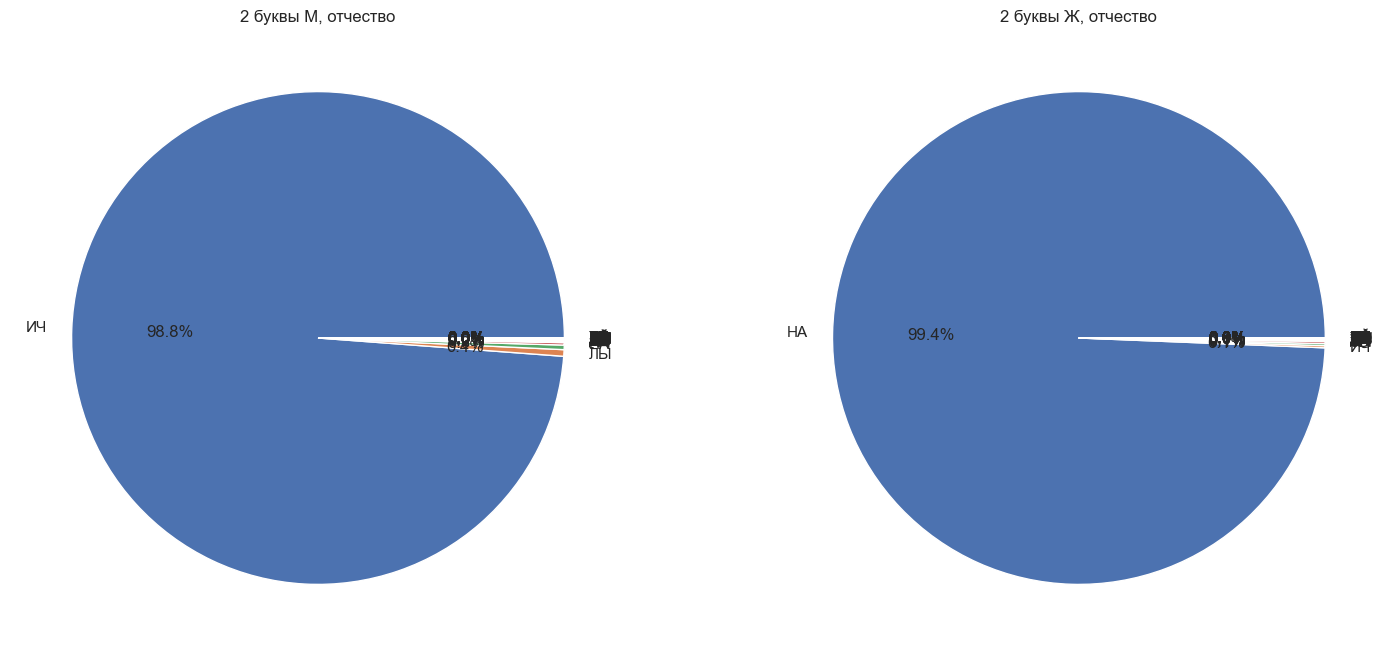

In [28]:
male_ends = males['father_name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
female_ends = females['father_name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].pie(male_ends.values, labels=male_ends.index, autopct="%1.1f%%")
ax[0].set_title('2 буквы М, отчество')
ax[1].pie(female_ends.values, labels=female_ends.index, autopct="%1.1f%%")
ax[1].set_title('2 буквы Ж, отчество')
plt.show()

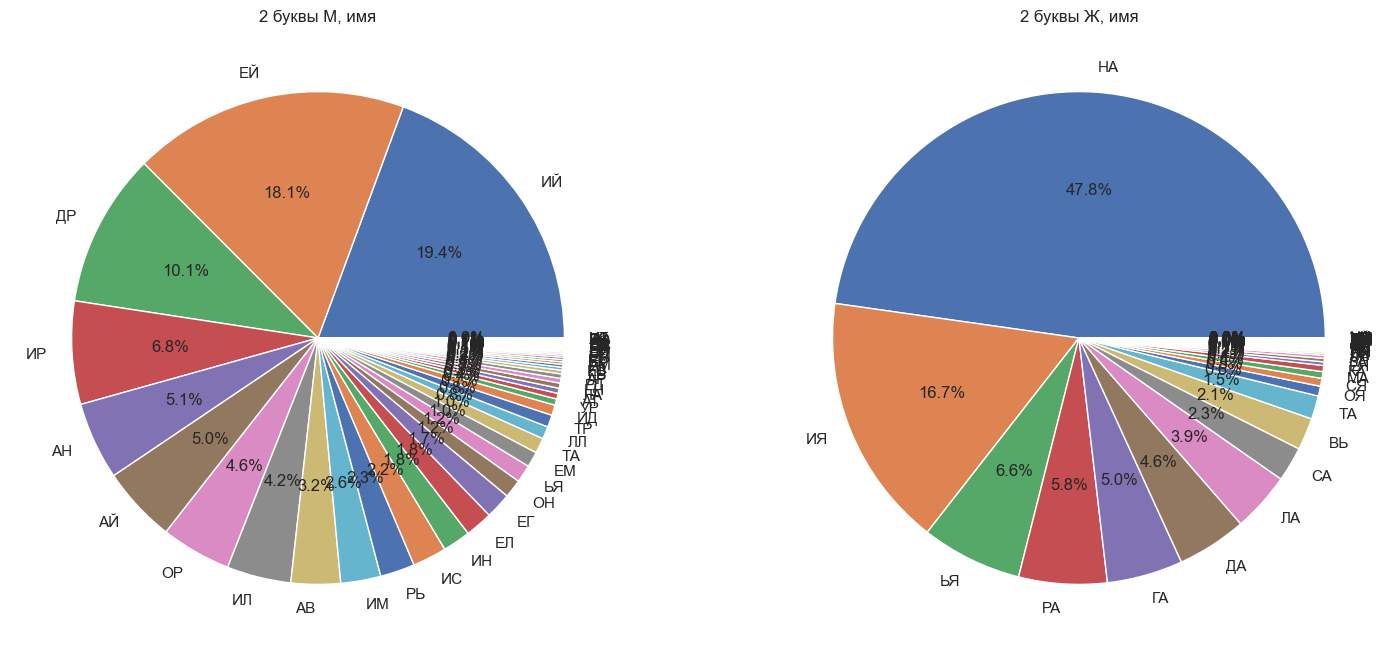

In [29]:
male_ends = males['name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
female_ends = females['name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].pie(male_ends.values, labels=male_ends.index, autopct="%1.1f%%")
ax[0].set_title('2 буквы М, имя')
ax[1].pie(female_ends.values, labels=female_ends.index, autopct="%1.1f%%")
ax[1].set_title('2 буквы Ж, имя')
plt.show()

In [30]:
vowels = set('ЁУЕЫАОЭЯИЮ')
def eval_vowel_num(string):
    return sum([*map(lambda x: string.count(x), vowels)])

def eval_vowel_ratio(string):
    if type(string) != str:
        return 0
    return eval_vowel_num(string.upper()) / len(string)

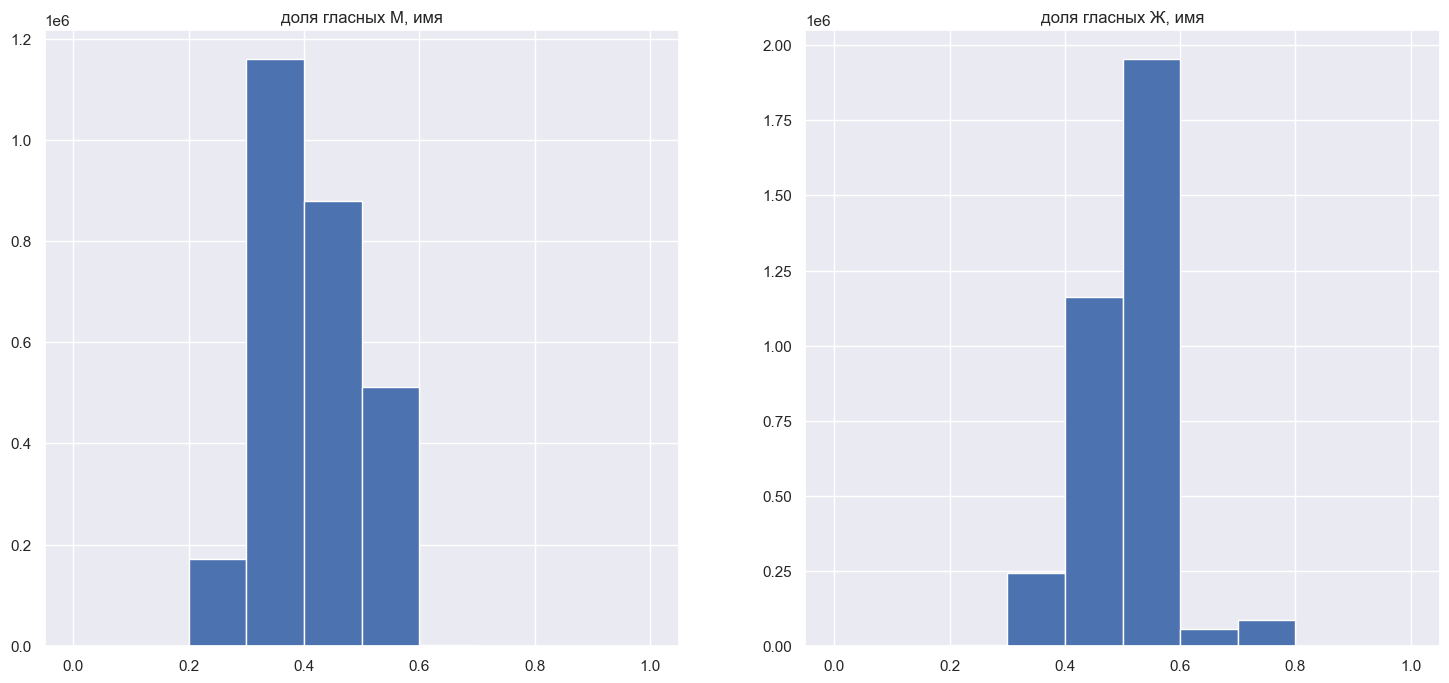

In [31]:
# для имен
male_vowel_counts = males['name'].apply(eval_vowel_ratio)
female_vowel_counts = females['name'].apply(eval_vowel_ratio)
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].hist(male_vowel_counts)
ax[0].set_title('доля гласных М, имя')
ax[1].hist(female_vowel_counts)
ax[1].set_title('доля гласных Ж, имя')
plt.show()

# Prepossessing

In [32]:
dataset = data.copy()

In [33]:
dataset = dataset.loc[dataset['sex'].isin(('М', 'Ж'))]

In [34]:
print(dataset.shape)
dataset = dataset.drop_duplicates()
dataset.shape

(6228600, 4)


(4222086, 4)

In [35]:
preprocess_str = lambda x: re.sub(r'\s+ ', '', str(x).upper()).replace('Ё', 'Е')

In [36]:
dataset['name'] = dataset['name'].apply(preprocess_str)
dataset['surname'] = dataset['surname'].apply(preprocess_str)
dataset['father_name'] = dataset['father_name'].apply(preprocess_str)

In [37]:
def is_cirillic(string):
    return bool(re.search('^([А-Я]+\-?[А-Я]+)?$', str(string)))

In [38]:
dataset = dataset[dataset['name'].apply(is_cirillic)]
dataset = dataset[dataset['surname'].apply(is_cirillic)]
dataset = dataset[dataset['father_name'].apply(is_cirillic)]

In [39]:
dataset.fillna('~1', inplace=True)

Закодируем пол как {'М': 1, 'Ж': 0)

In [40]:
dataset['sex'] = dataset['sex'].apply(lambda x: int(x == 'М'))

In [41]:
dataset.to_csv('preprocessed_nofeatures.csv', index=False)

In [42]:
coded = dataset.copy()

In [43]:
coded['vowel_rate'] = coded['name'].apply(eval_vowel_ratio)

In [44]:
coded['surend'] = coded['surname'].apply(lambda x: x[-2:])
coded['nameend'] = coded['name'].apply(lambda x: x[-2:])
coded['fatend'] = coded['father_name'].apply(lambda x: x[-2:])
coded['num_let_sur'] = coded['surname'].apply(lambda x: len(x))
coded['num_let_nam'] = coded['name'].apply(lambda x: len(x))
coded['num_let_fat'] = coded['father_name'].apply(lambda x: len(x))
coded['has_m_fatend'] = coded['father_name'].apply(lambda x: int(x[-2:] in set(['ИЧ', 'ЛЫ'])))
coded['has_m_surend'] = coded['surname'].apply(lambda x: int(x[-2:] in set(['ОВ', 'ИН', 'ЯН'])))
coded['has_m_namend'] = coded['name'].apply(lambda x: int(x[-2:] in set(['ИЙ', 'ЕЙ', 'ДР', 'ИР', 'АН', 'АЙ', 'ОР'])))
coded

,surname,name,father_name,sex,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,1,0.333333,ИЙ,ЕЙ,ИЧ,6,6,10,1,0,1
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,1,0.285714,ОВ,ИЙ,ИЧ,8,7,10,1,1,1
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,1,0.375000,ОВ,ИР,ИЧ,8,8,8,1,1,1
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,1,0.333333,ОВ,ЕЙ,ИЧ,8,6,8,1,1,1
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,1,0.500000,ОВ,ИЙ,ИЧ,8,4,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228558,КСЕНДА,ГРИГОРИЙ,ИВАНОВИЧ,1,0.375000,ДА,ИЙ,ИЧ,6,8,8,1,0,1
6228571,МЕЩЕРЯКОВА,АЛЕНА,ГЕННАДИЕВНА,0,0.600000,ВА,НА,НА,10,5,11,0,0,0
6228584,ШЕСТОПЕРОВ,ИВАН,ВАСИЛЬЕВИЧ,1,0.500000,ОВ,АН,ИЧ,10,4,10,1,1,1
6228601,СЕМЕНОВА,ЕФРОСИНЬЯ,ВАСИЛЬЕВНА,0,0.444444,ВА,ЬЯ,НА,8,9,10,0,0,0


In [45]:
#coded = coded.drop(columns=['surname', 'name', 'father_name'])
coded

,surname,name,father_name,sex,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,1,0.333333,ИЙ,ЕЙ,ИЧ,6,6,10,1,0,1
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,1,0.285714,ОВ,ИЙ,ИЧ,8,7,10,1,1,1
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,1,0.375000,ОВ,ИР,ИЧ,8,8,8,1,1,1
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,1,0.333333,ОВ,ЕЙ,ИЧ,8,6,8,1,1,1
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,1,0.500000,ОВ,ИЙ,ИЧ,8,4,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228558,КСЕНДА,ГРИГОРИЙ,ИВАНОВИЧ,1,0.375000,ДА,ИЙ,ИЧ,6,8,8,1,0,1
6228571,МЕЩЕРЯКОВА,АЛЕНА,ГЕННАДИЕВНА,0,0.600000,ВА,НА,НА,10,5,11,0,0,0
6228584,ШЕСТОПЕРОВ,ИВАН,ВАСИЛЬЕВИЧ,1,0.500000,ОВ,АН,ИЧ,10,4,10,1,1,1
6228601,СЕМЕНОВА,ЕФРОСИНЬЯ,ВАСИЛЬЕВНА,0,0.444444,ВА,ЬЯ,НА,8,9,10,0,0,0


In [46]:
coded.to_csv('preprocessed_features_letter.csv', index=False)

In [47]:
from functools import reduce
def string_norm(min_letter, string):
  return reduce(lambda prev, cur: prev + cur ** 2, map(lambda x: ord(x) - ord(min_letter) + 1, string))

In [48]:
numeric = coded.copy()

In [49]:
from functools import partial
string_norm_app = partial(string_norm, 'А')

In [50]:

numeric['fatend'] = coded['fatend'].apply(string_norm_app)
numeric['nameend'] = coded['nameend'].apply(string_norm_app)
numeric['surend'] = coded['surend'].apply(string_norm_app)

In [51]:
pd.isnull(numeric).sum()

surname         0
name            0
father_name     0
sex             0
vowel_rate      0
surend          0
nameend         0
fatend          0
num_let_sur     0
num_let_nam     0
num_let_fat     0
has_m_fatend    0
has_m_surend    0
has_m_namend    0
dtype: int64

In [52]:
numeric.to_csv('preprocessed_features.csv', index=False)

# Модели

In [53]:
numeric = pd.read_csv("preprocessed_features.csv")

In [54]:
y = numeric['sex']
# 
X = numeric[['surname', 'name', 'father_name', 'vowel_rate', 'surend', 'nameend', 'fatend', 'num_let_sur', 'num_let_nam', 'num_let_fat', 'has_m_fatend', 'has_m_surend', 'has_m_namend']]


In [55]:
X.head(10)


,surname,name,father_name,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,0.333333,109,106,585,6,6,10,1,0,1
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,0.285714,24,109,585,8,7,10,1,1,1
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,0.375000,24,298,585,8,8,8,1,1,1
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,0.333333,24,106,585,8,6,8,1,1,1
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,0.500000,24,109,585,8,4,12,1,1,1
5,АБАБИЛОВ,АЛЕКСЕЙ,НИКОЛАЕВИЧ,0.428571,24,106,585,8,7,10,1,1,1
6,АБАБИЛОВ,ВАСИЛИЙ,ФЕДОРОВИЧ,0.428571,24,109,585,8,7,9,1,1,1
7,АБАБИЛОВ,СЕРГЕЙ,ВАСИЛЬЕВИЧ,0.333333,24,106,585,8,6,10,1,1,1
8,АБАБИЛОВ,ЛЕОНИД,АЛЕКСЕЕВИЧ,0.500000,24,34,585,8,6,10,1,1,0
9,АБАБИЛОВА,НИНА,ПЕТРОВНА,0.500000,4,15,15,9,4,8,0,0,0


In [56]:
from sklearn.model_selection import train_test_split

X_train_w, X_test_w, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1810)

In [57]:
# , 'has_m_fatend', 'has_m_surend', 'has_m_namend'
indices = ['vowel_rate', 'surend', 'nameend', 'fatend', 'num_let_sur', 'num_let_nam', 'num_let_fat', 'has_m_fatend', 'has_m_surend', 'has_m_namend']
X_train = X_train_w[indices]
X_test = X_test_w[indices]

In [58]:
X_train, ind = np.unique(X_train, return_index=True, axis=0)
y_train = np.take(y_train, ind, axis=0)

In [59]:
print(X.shape)
print(X_train.shape) 
print(X_test.shape)

(4188254, 13)
(245542, 10)
(837651, 10)


### Desicion Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

dt_model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\nemow\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


accuracy = 0.9973676387899018
precision = 0.9973111516872929
recall = 0.9967260713938122
f1_score = 0.9970185257049057


## Linear regression

In [61]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\nemow\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


accuracy = 0.9957691210301187
precision = 0.9936728207209035
recall = 0.9967303502188359
f1_score = 0.9951992370796623


## Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
logr_model = LogisticRegression(solver='sag')
logr_model.fit(X_train, y_train)
y_pred =logr_model.predict(X_test)
# y_pred = np.where(y_pred > 0.5, 1, 0)
print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\nemow\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nemow\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


accuracy = 0.99610338912029
precision = 0.99500371948333
recall = 0.9961624395726415
f1_score = 0.9955827423807719


## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, max_depth=4, criterion='entropy')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\nemow\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


accuracy = 0.9974404614809748
precision = 0.9973544329478596
recall = 0.9968474813647216
f1_score = 0.9971008927195087


## Catboost

In [64]:
from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', eval_metric='AUC')

cb_model.fit(X_train, y_train)

y_pred = cb_model.predict(X_test)
probes = cb_model.predict_proba(X_test)

print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')


0:	total: 167ms	remaining: 2m 47s
1:	total: 185ms	remaining: 1m 32s
2:	total: 201ms	remaining: 1m 6s
3:	total: 217ms	remaining: 54.2s
4:	total: 234ms	remaining: 46.6s
5:	total: 250ms	remaining: 41.5s
6:	total: 268ms	remaining: 38s
7:	total: 285ms	remaining: 35.3s
8:	total: 301ms	remaining: 33.1s
9:	total: 316ms	remaining: 31.3s
10:	total: 331ms	remaining: 29.8s
11:	total: 348ms	remaining: 28.6s
12:	total: 365ms	remaining: 27.7s
13:	total: 385ms	remaining: 27.1s
14:	total: 405ms	remaining: 26.6s
15:	total: 423ms	remaining: 26s
16:	total: 442ms	remaining: 25.6s
17:	total: 462ms	remaining: 25.2s
18:	total: 483ms	remaining: 24.9s
19:	total: 499ms	remaining: 24.5s
20:	total: 517ms	remaining: 24.1s
21:	total: 537ms	remaining: 23.9s
22:	total: 556ms	remaining: 23.6s
23:	total: 574ms	remaining: 23.3s
24:	total: 593ms	remaining: 23.1s
25:	total: 611ms	remaining: 22.9s
26:	total: 630ms	remaining: 22.7s
27:	total: 647ms	remaining: 22.5s
28:	total: 664ms	remaining: 22.2s
29:	total: 681ms	remaining

In [65]:
processed = X_test_w.copy()

In [66]:
processed['expected'] = y_test

In [67]:
processed['predicted'] = probes[:, 1]

In [68]:
processed['error'] = np.abs(processed['expected'] - processed['predicted'])

In [69]:
processed

,surname,name,father_name,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend,expected,predicted,error
2572097,ГРЕЧИХА,АННА,ВАСИЛЬЕВНА,0.500000,23,15,15,7,4,10,0,0,0,0,0.001809,0.001809
2523906,ЛАЗАРЕВА,СОФЬЯ,ПАВЛОВНА,0.400000,4,1053,15,8,5,8,0,0,0,0,0.002157,0.002157
4029133,КОЛДАШЕВА,НИНА,ПАВЛОВНА,0.500000,4,15,15,9,4,8,0,0,0,0,0.001122,0.001122
1077905,КОНОВАЛЕНКО,ВЛАДЛЕН,ВИТАЛЬЕВИЧ,0.285714,236,202,585,11,7,10,1,0,0,1,0.997662,0.002338
3892035,БАРЧЕНКОВА,ЗОЯ,ЕГОРОВНА,0.666667,4,1039,15,10,3,8,0,0,0,0,0.000827,0.000827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843336,ФИЛИМОНОВ,ЕВГЕНИЙ,ВАЛЕРЬЕВИЧ,0.428571,24,109,585,9,7,10,1,1,1,1,0.998641,0.001359
1479436,НИКУШИН,СЕРГЕЙ,МИХАЙЛОВИЧ,0.333333,205,106,585,7,6,10,1,1,1,1,0.998564,0.001436
4072415,КАЛЯКИНА,НАТАЛЬЯ,ИВАНОВНА,0.428571,15,1053,15,8,7,8,0,0,0,0,0.002187,0.002187
180647,ГАРМАЙ,РАИСА,МАКСИМОВНА,0.600000,101,19,15,6,5,10,0,0,0,0,0.001536,0.001536


In [70]:
processed_sorted = processed.sort_values(by='error')

## Меньше ошибок

In [71]:
processed_sorted[:20]

,surname,name,father_name,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend,expected,predicted,error
2819805,ЯНОВ,ВЛАДИСЛАВ,РОМАНОВИЧ,0.333333,24,10,585,4,9,9,1,1,0,1,0.999829,0.000171
997044,ЮРОВ,СТАНИСЛАВ,ФЕДОРОВИЧ,0.333333,24,10,585,4,9,9,1,1,0,1,0.999829,0.000171
4024746,ЕЖОВ,СТАНИСЛАВ,ИВАНОВИЧ,0.333333,24,10,585,4,9,8,1,1,0,1,0.999827,0.000173
3386122,ЕЖОВ,СТАНИСЛАВ,НИКОЛАЕВИЧ,0.333333,24,10,585,4,9,10,1,1,0,1,0.999815,0.000185
3533369,ОХОВ,СТАНИСЛАВ,АЛЕКСЕЕВИЧ,0.333333,24,10,585,4,9,10,1,1,0,1,0.999815,0.000185
3344970,ЕЖОВ,ВЛАДИСЛАВ,ГРИГОРЬЕВИЧ,0.333333,24,10,585,4,9,11,1,1,0,1,0.999812,0.000188
2325383,РОСТОВ,ВЛАДИСЛАВ,НАУМОВИЧ,0.333333,24,10,585,6,9,8,1,1,0,1,0.999790,0.000210
3085948,БАЙКОВ,ВЛАДИСЛАВ,ИГОРЕВИЧ,0.333333,24,10,585,6,9,8,1,1,0,1,0.999790,0.000210
2431249,ЗДОРОВ,ВЯЧЕЛСЛАВ,ИВАНОВИЧ,0.333333,24,10,585,6,9,8,1,1,0,1,0.999790,0.000210
3264217,ЯКИНОВ,ВЛАДИСЛАВ,ОЛЕГОВИЧ,0.333333,24,10,585,6,9,8,1,1,0,1,0.999790,0.000210


## Больше

In [72]:
processed_sorted[-20:]

,surname,name,father_name,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend,expected,predicted,error
1657258,БОЧАРОВА,РАИСА,НУРИСЛАМОВНА,0.600000,4,19,15,8,5,12,0,0,0,1,0.000568,0.999432
3840250,СЕРПОКРЫЛОВА,ТАТЬЯНА,ВЛАДИМИРОВНА,0.428571,4,15,15,12,7,12,0,0,0,1,0.000559,0.999441
509102,ЛЕВАЯ,ИРИНА,МИХАЙЛОВНА,0.600000,1025,15,15,5,5,10,0,0,0,1,0.000553,0.999447
3487237,ДУРНЕЦОВА,АНАСТАСИЯ,ВЛАДИМИРОВНА,0.555556,4,1033,15,9,9,12,0,0,0,1,0.000545,0.999455
588454,МИХАЙЛОВА,АНАСТАСИЯ,ВЛАДИМИРОВНА,0.555556,4,1033,15,9,9,12,0,0,0,1,0.000545,0.999455
2092021,СЕРГЕЕВА,СВЕТЛАНА,ВЛАДИМИРОВНА,0.375000,4,15,15,8,8,12,0,0,0,1,0.000530,0.999470
3384168,ТУРАНОВА,СВЕТЛАНА,ВАЛЕНТИНОВНА,0.375000,4,15,15,8,8,12,0,0,0,1,0.000530,0.999470
1222413,ФЕОФАНОВА,СВЕТЛАНА,АЛЕКСАНДРОВНА,0.375000,4,15,15,9,8,13,0,0,0,1,0.000523,0.999477
601779,МОСКОВСКАЯ,ВАЛЕНТИНА,ВЛАДИМИРОВНА,0.444444,1025,15,15,10,9,12,0,0,0,1,0.000501,0.999499
1292184,ТКАЧЕНКО,ЕЛЕНА,ВЛАДИМИРОВНА,0.600000,236,15,15,8,5,12,0,0,0,1,0.000493,0.999507


In [73]:
def preprocess(surname, name, father_name):
    string_norm_app = partial(string_norm, 'А')
    preprocess_str = lambda x: re.sub(r'\s+ ', '', str(x).upper()).replace('Ё', 'Е')

    surname, name, father_name = map(lambda x: '~' if pd.isna(x) else x, [surname, name, father_name])

    surname_n = preprocess_str(surname)[-2:]
    name_n = preprocess_str(name)[-2:]
    father_n = preprocess_str(father_name)[-2:]
    vowel_rate = eval_vowel_ratio(name)
    num_let_sur = len(surname)
    num_let_nam = len(name)
    num_let_fat = len(father_name)
    has_m_fatend = int(father_name[-2:] in set(['ИЧ', 'ЛЫ']))
    has_m_surend = int(surname[-2:] in set(['ОВ', 'ИН', 'ЯН']))
    has_m_namend = int(name[-2:] in set(['ИЙ', 'ЕЙ', 'ДР', 'ИР', 'АН', 'АЙ', 'ОР']))
    return np.array([
        vowel_rate,
        string_norm_app(surname_n),
        string_norm_app(name_n),
        string_norm_app(father_n),
        num_let_sur,
        num_let_nam,
        num_let_fat,
        has_m_fatend,
        has_m_surend,
        has_m_namend
    ])

In [74]:
vector = preprocess('Благовидов', 'Ануар', 'Расульевич').reshape(1, -1)
print(cb_model.predict(vector))

[1]


In [75]:
cb_model.save_model('names.cbm', format='cbm')

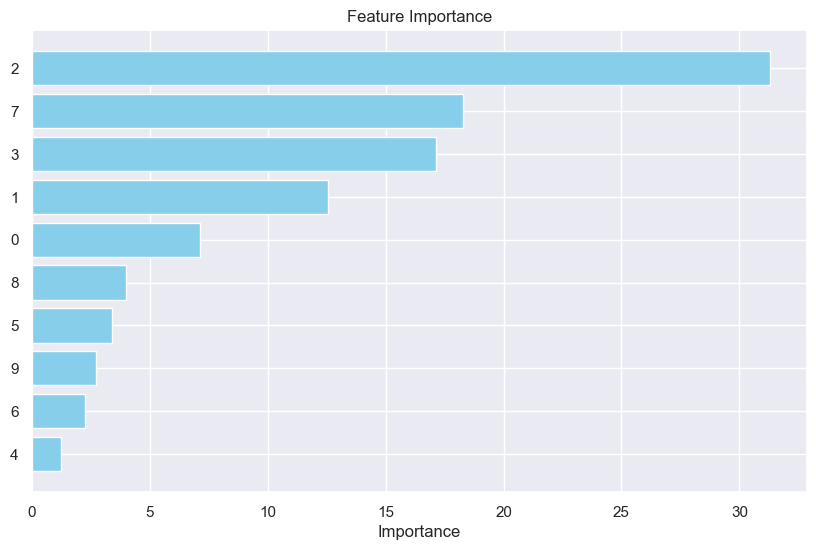

In [76]:
feature_importances = cb_model.get_feature_importance()

feature_names = cb_model.feature_names_

import pandas as pd

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()